In [28]:
# For Loading and Manipulating the data
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# For splitting and scaling the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# For Evaluation
from sklearn.metrics import classification_report, confusion_matrix,f1_score
from time import time

# For Visualization Purposes
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To display all the columns ( regardless of their number or their width )
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# To change the style of the plots ( so that we all can see the same thing :) )
plt.style.use('seaborn')


In [29]:
# importing the Python module
import sklearn

# importing the dataset
from sklearn.datasets import load_breast_cancer


In [30]:
# loading the dataset
data = load_breast_cancer()


In [31]:
# loading the dataset
data = load_breast_cancer()


In [32]:
# Organize our data
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']


In [33]:
df=pd.DataFrame(features)

In [34]:
df.columns=feature_names

In [35]:
df['labels']=labels

In [36]:
#Statics of different columns of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [37]:
#Checking datatype of different columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [38]:
#Checking total number of missing values in all columns
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
labels                     0
dtype: int64

In [39]:
#Checking duplicate rows
df.duplicated().sum()

0

In [40]:
print(df['labels'].value_counts())


1    357
0    212
Name: labels, dtype: int64


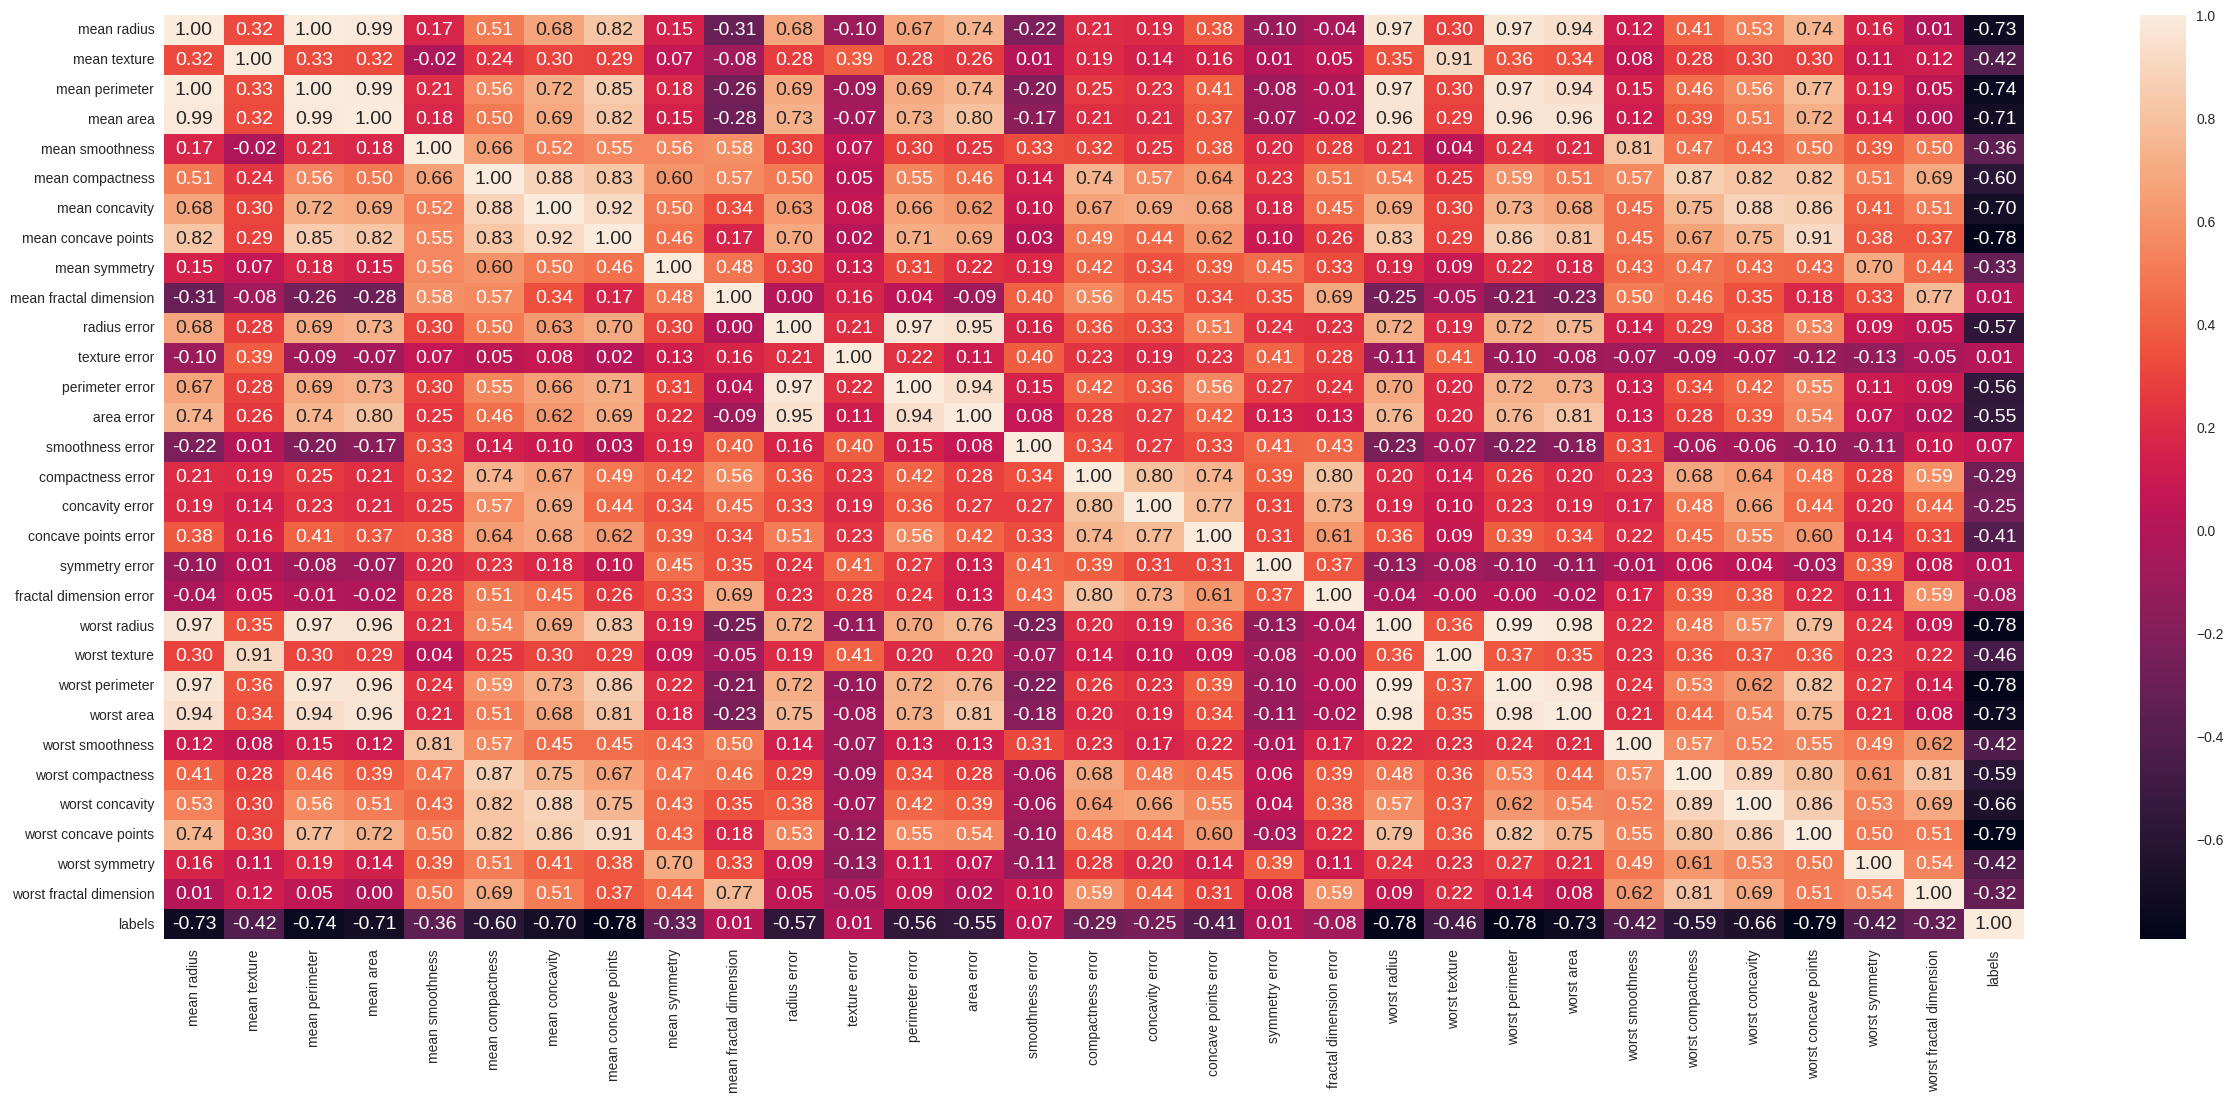

In [41]:
plt.figure(figsize=(30,12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', annot_kws={'fontsize':14});

In [42]:
X = df.drop(columns=["labels"])
y = df["labels"]

In [43]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: labels, Length: 569, dtype: int64

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25,stratify=y)

In [45]:
y_train.value_counts()

1    285
0    170
Name: labels, dtype: int64

In [46]:
X_train.shape

(455, 30)

In [47]:
X_test.shape

(114, 30)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
X_train_scaled

array([[ 0.1016452 ,  1.34232289,  0.16451665, ...,  0.11459131,
         0.45433136,  1.02411721],
       [-0.51183794,  1.78558743, -0.44734926, ...,  0.50723393,
         0.49998163,  2.03233979],
       [ 0.84761765,  0.39653383,  0.8318929 , ...,  1.07610197,
        -0.46519569, -0.43337378],
       ...,
       [ 1.86432914,  0.4534234 ,  1.91705754, ...,  1.51821138,
        -0.69833819,  0.34218205],
       [-0.09132837, -0.83844386, -0.06002896, ...,  0.38975031,
        -0.52062817,  1.06289501],
       [ 3.19786291,  1.3233597 ,  3.32359786, ...,  2.68377254,
        -0.90213408,  1.17922838]])

In [51]:
model_params={
    "random_forest":{
        'model': RandomForestClassifier(),
        'params':{
            'n_estimators': [i for i in range(1,10)]
        }
    },
    'logistic_regression':{
        'model': LogisticRegression(solver='liblinear'),
        'params':{
            'C': [i for i in range(1,10)]
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(random_state=0),
        'params':{
             'max_depth':[i for i in range(1,5)]
        }
    },
    "gradient_boosting":{
        'model': GradientBoostingClassifier(),
        'params':{
            'max_depth':[i for i in range(1,5)],
            'n_estimators':[i for i in range(1,5)]
        }

    },
}

for  RandomForestClassifier()  confusion metrics is 


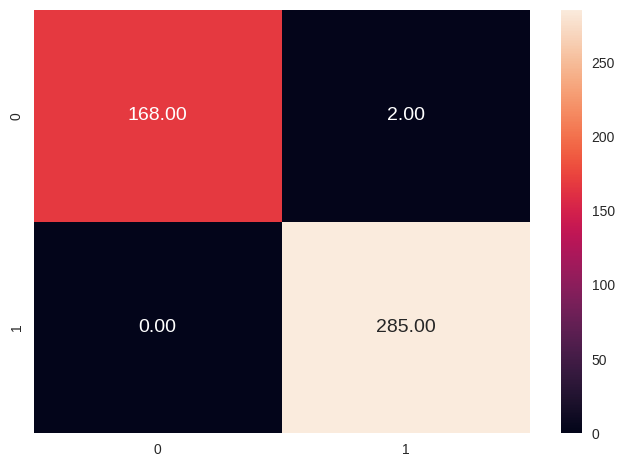

for  LogisticRegression(solver='liblinear')  confusion metrics is 


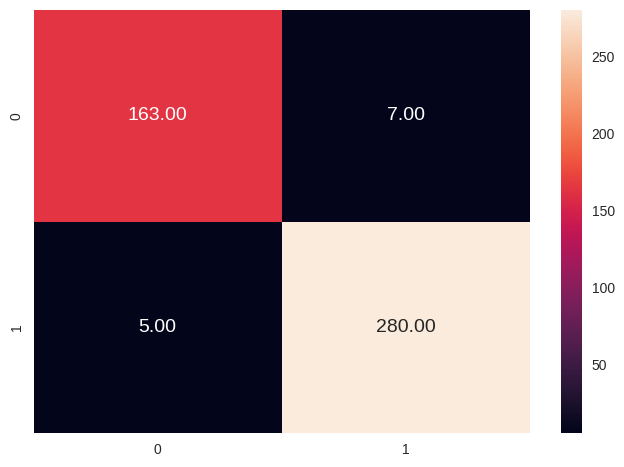

for  DecisionTreeClassifier(random_state=0)  confusion metrics is 


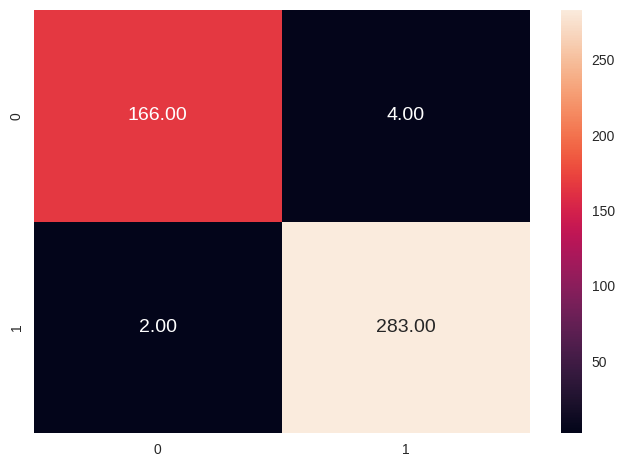

for  GradientBoostingClassifier()  confusion metrics is 


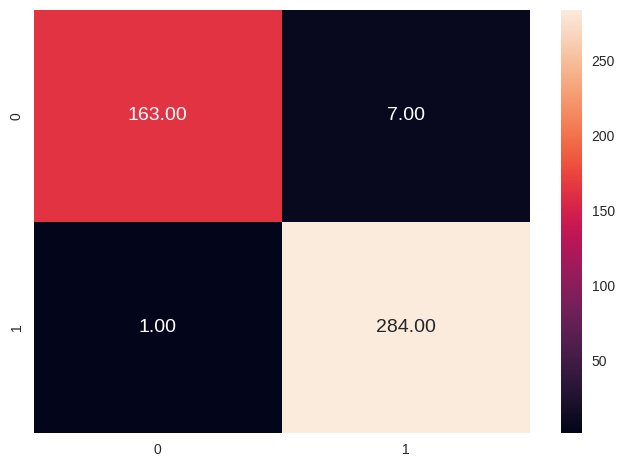

,model,best score,best params,f1 score
0,random_forest,0.962637,{'n_estimators': 3},0.996503
1,logistic_regression,0.960440,{'C': 9},0.979021
3,gradient_boosting,0.949451,"{'max_depth': 4, 'n_estimators': 3}",0.986111
2,decision_tree,0.938462,{'max_depth': 4},0.989510


In [52]:
scores = []
for mn,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_train)
    scores.append({
        'model' : mn,
        'best score': clf.best_score_,
        "best params": clf.best_params_,
        "f1 score": f1_score(y_train,y_pred)
    })

    print('for ',mp['model'], ' confusion metrics is ')
    sns.heatmap(confusion_matrix(y_train,y_pred),annot=True, fmt='.2f', annot_kws={'fontsize':14})
    plt.show()

df1 = pd.DataFrame(scores, columns=["model","best score",'best params',"f1 score"])
df1.sort_values(by=['best score'], ascending=False)

for  RandomForestClassifier()  confusion metrics is 


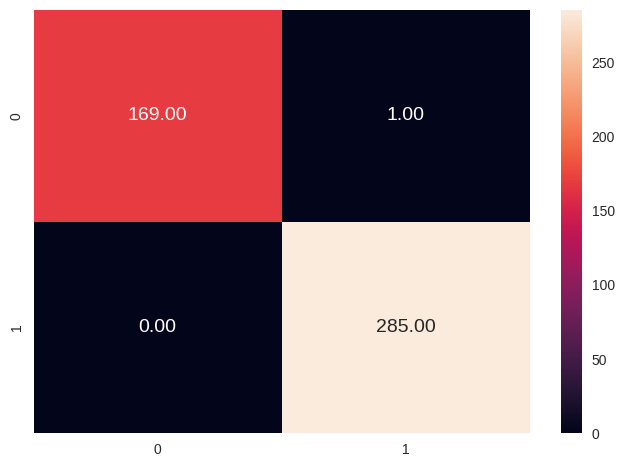

for  LogisticRegression(solver='liblinear')  confusion metrics is 


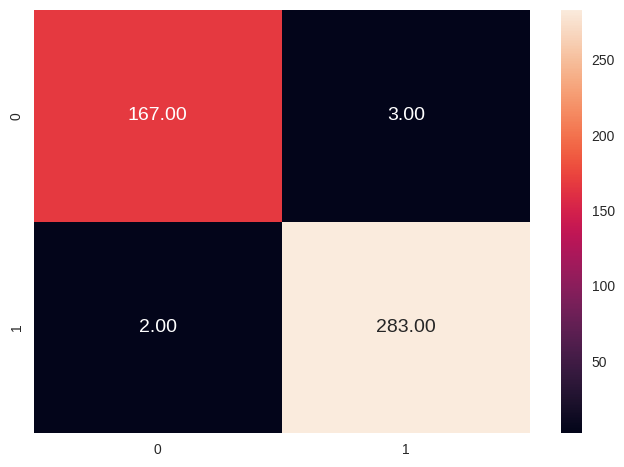

for  DecisionTreeClassifier(random_state=0)  confusion metrics is 


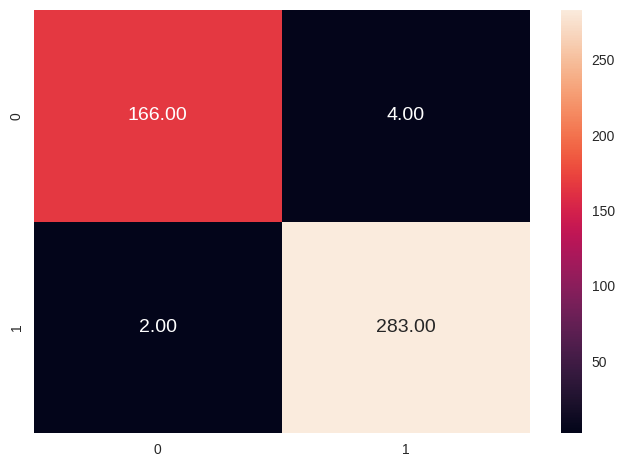

for  GradientBoostingClassifier()  confusion metrics is 


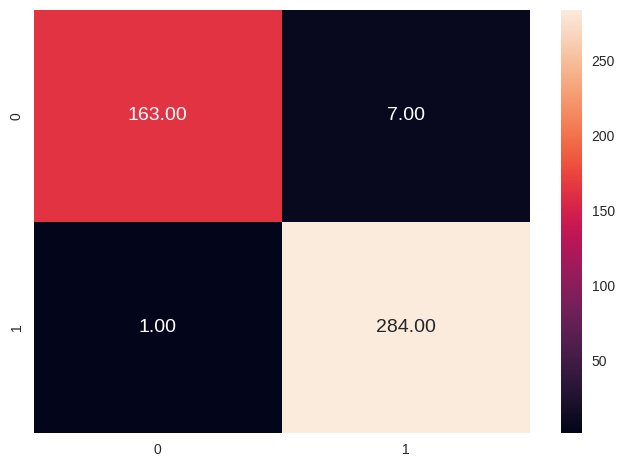

,model,best score,best params,f1 score
1,logistic_regression,0.978022,{'C': 1},0.991243
0,random_forest,0.951648,{'n_estimators': 9},0.998249
3,gradient_boosting,0.942857,"{'max_depth': 4, 'n_estimators': 3}",0.986111
2,decision_tree,0.938462,{'max_depth': 4},0.989510


In [53]:
scores_scaled = []
for mn,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=5,return_train_score=False)
    clf.fit(X_train_scaled,y_train)
    y_pred=clf.predict(X_train_scaled)
    scores_scaled.append({
        'model' : mn,
        'best score': clf.best_score_,
        "best params": clf.best_params_,
        "f1 score": f1_score(y_train,y_pred)
    })

    print('for ',mp['model'], ' confusion metrics is ')
    sns.heatmap(confusion_matrix(y_train,y_pred),annot=True, fmt='.2f', annot_kws={'fontsize':14})
    plt.show()

df2 = pd.DataFrame(scores_scaled, columns=["model","best score",'best params','f1 score'])
df2.sort_values(by=['best score'], ascending=False)